1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR``` a ```MONTH```
5. Vypište za pomoci funkce print() datové typy jednotlivých sloupců.

In [1]:
# Buňka pro body 1-5
import pandas as pd
url = r'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'

df = pd.read_csv(url,sep=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
print(df.dtypes)


STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
YEAR                int32
MONTH               int32
dtype: object


6. Filtrujte ```df``` na YEAR >= 2015 a uložte do proměnné ```df_filtrovano```.
7. Upravte ```df_filtrovano```, aby obsahoval sloupce ```DATE```, ```YEAR``` a ```MONTH```, ```PRCP``` 
8. Do proměnné ```df_info``` uložte informaci o počtu řádků a sloupců v ```df_filtrovano```.
9. Vypište prvních 5 řádků ```df_filtrovano```.

In [2]:
# Buňka pro body 6-9	

df_filtrovano = df.loc[df['YEAR']>=2015]
df_filtrovano = df_filtrovano[['DATE','YEAR','MONTH','PRCP']]
df_info = df_filtrovano.shape
print(df_filtrovano.head())


           DATE  YEAR  MONTH  PRCP
2953 2015-01-01  2015      1   0.0
2954 2015-01-02  2015      1   5.7
2955 2015-01-03  2015      1  43.7
2956 2015-01-04  2015      1   1.8
2957 2015-01-05  2015      1   0.0


10. Do proměnné ```df_agregovano``` agregujte data z ```df_filtrovano``` dle sloupce ```YEAR``` a spočítejte sumu hodnot sloupce ```PRCP```.
11. Seřaďte ```df_agregovano``` vzestupně dle sloupce ```YEAR```.
12. Identifikujte, který rok měl nejvíce srážek a kolik to bylo.
13. Identifikujte, který rok měl nejméně srážek a kolik to bylo.
14. Hodnoty z bodů 12 a 13 vypište za pomoci funkce print()

In [22]:
# Buňka pro body 10-14
#10 agregace
df_agregovano  =df_filtrovano.groupby('YEAR',as_index=False)['PRCP'].sum()
#11 řazení vzeestupně dle YEAR
df_agregovano = df_agregovano.sort_values('YEAR',ascending=True)
#12 maximální srážky, resp. maximální hodnota ze sloupce PRCP
max_srazky = df_agregovano['PRCP'].max()
rok_max_srazky = df_agregovano.loc[df_agregovano['PRCP'] == max_srazky,'YEAR'].values[0]

#13 minimum_srazek
min_srazky = df_agregovano['PRCP'].min()
rok_min_srazky = df_agregovano.loc[df_agregovano['PRCP'] == min_srazky,'YEAR'].values[0]
#14
print(f'Maximální roční srážky činí {max_srazky}, a to v roce/ letech {rok_max_srazky}.\n Minimální roční srážky činí {min_srazky}, a to v roce/ letech {rok_min_srazky}.')

Maximální roční srážky činí 9849.4, a to v roce/ letech 2017.
 Minimální roční srážky činí 4919.2, a to v roce/ letech 2018.


15. Do sloupcového grafu vizualizujte data z ```df_agregovano```
16. Vytvořte pivot tabulku z proměnné ```df``` s indexem ```YEAR```, sloupcem ```NAME```  hodnotou ```PRCP``` a funkcí ```sum```. Uložte do proměnné ```df_pivot```.




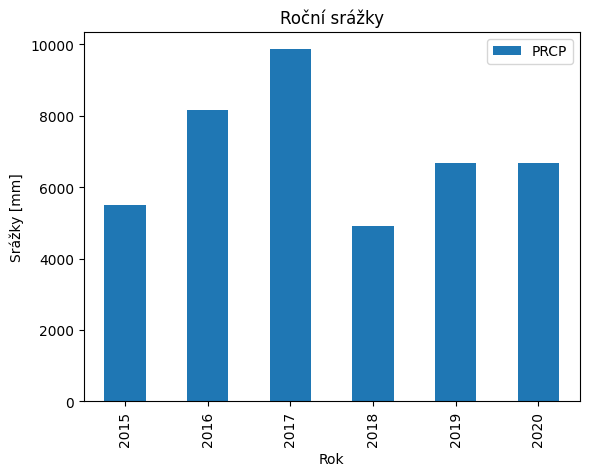

In [25]:
# Buňka pro body 15-16
#15
df_agregovano.plot.bar(x='YEAR',y='PRCP',title='Roční srážky',xlabel='Rok',ylabel='Srážky [mm]')
#16
df_pivot = df.pivot_table(index='YEAR',columns='NAME',values='PRCP',aggfunc='sum')
df_pivot
df.to_clipboard()

17. Do proměnné df_kategorie vytvořte kopii proměnné ```df```.
18. Za pomoci metody .qcut() vytvořte  do sloupce ```INTERVAL``` intervaly [-np.inf,0,5,10,np.inf] a dejte jim popisky ['neprselo','prselo malo','prselo akorat','prselo moc']
19. Agregujte ```df_kategorie``` dle sloupců ```YEAR```, ```NAME```  a ```INTERVAL``` a spočítejte počet hodnot sloupce ```DATE```.
20. Do proměnné ```df_kategorie_max``` identifikujte, ve kterém ```YEAR``` a ```NAME``` bylo nejvíce položek s hodnotou ```prselo moc```.


In [5]:
# Buňka pro body 17-20